# Observação:

O dataset que escolhemos era separado por datas, então empilhamos os datasets em unico, deixando o estudo mais completo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Passo 1: Filtro dos dados

Alguns campos do dataset original, possuem uma lista a função abaixo faz

In [2]:
df = pd.read_csv('./resultado_empilhado.csv', encoding='utf-8', on_bad_lines='skip')

# Função para extrair o primeiro nome de listas em string
def pega_primeiro_nome(entry):
    if pd.isnull(entry):
        return None
    try:
        names = ast.literal_eval(entry)
        if isinstance(names, list) and len(names) > 0:
            return str(names[0]).strip()
        else:
            return entry.strip()
    except:
        # Se falhar ao interpretar como lista, pega o primeiro nome separado por vírgula
        return entry.split(',')[0].strip().replace("[", "").replace("]", "").replace("'", "").replace('"', "")

# Aplicar a função nas colunas relevantes e criar novas colunas
cols_to_clean = ['directors', 'writers', 'stars', 'genres', 'countries_origin','filming_locations','Languages']
for col in cols_to_clean:
    new_col = 'first_' + col
    df[new_col] = df[col].apply(pega_primeiro_nome)

# Exportar apenas a primeira linha do DataFrame limpo
# df.to_excel('./df_limpo.xlsx', index=False)



In [3]:
freq_genres = df['first_genres'].value_counts()

In [4]:
print(freq_genres)

first_genres
Drama                6655
Comedy               5458
Action               2834
Crime                1538
Documentary          1458
                     ... 
Korean Drama            2
Holiday Animation       2
Soap Opera              1
Urban Adventure         1
Sitcom                  1
Name: count, Length: 179, dtype: int64


Tabelas de frequencias:

In [5]:
# 1. Tabela de frequência qualitativa (genres)
freq_genres = df['first_genres'].value_counts().head(10)

# Tabela de Frequência - Genres e quantidade
fig_genres = go.Figure(data=[go.Table(
    header=dict(values=['Gênero', 'Quantidade'],
                fill_color='paleturquoise',
                align='left',
                font=dict(color='black', size=14)),
    cells=dict(values=[freq_genres.index, freq_genres.values],
               fill_color='lavender',
               align='left',
               font=dict(color='black', size=12))
)])

fig_genres.update_layout(title="Tabela de Frequência - Gêneros", width=600, height=700)
fig_genres.show()

# 2. Tabela de frequência quantitativa (Rating)
# Agrupar por faixas de rating
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
df['rating_bins'] = pd.cut(df['Rating'], bins=bins, labels=labels)
freq_rating = df['rating_bins'].value_counts().sort_index()

# Tabela de Frequência - Rating com Plotly
fig_rating = go.Figure(data=[go.Table(
    header=dict(values=['Faixa de Rating', 'Quantidade'],
                fill_color='paleturquoise',
                align='left',
                font=dict(color='black', size=14)),
    cells=dict(values=[freq_rating.index.astype(str), freq_rating.values],
               fill_color='lavender',
               align='left',
               font=dict(color='black', size=12))
)])

fig_rating.update_layout(title="Tabela de Frequência - Rating", width=600, height=400)
fig_rating.show()


C:\Users\mathe\AppData\Local\Temp\ipykernel_23448\606283222.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




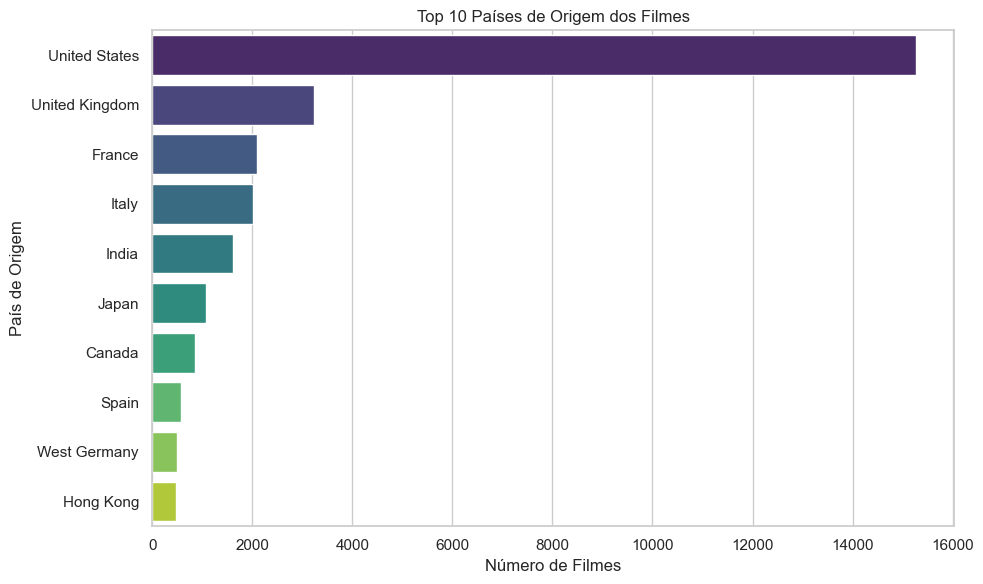

In [6]:

sns.set(style="whitegrid")

# 1. Gráfico de Barras - Países de Origem
country_counts = df['first_countries_origin'][(df['first_countries_origin'] != '') & (df['first_countries_origin'].notnull())].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title('Top 10 Países de Origem dos Filmes')
plt.xlabel('Número de Filmes')
plt.ylabel('País de Origem')
plt.tight_layout()
plt.show()


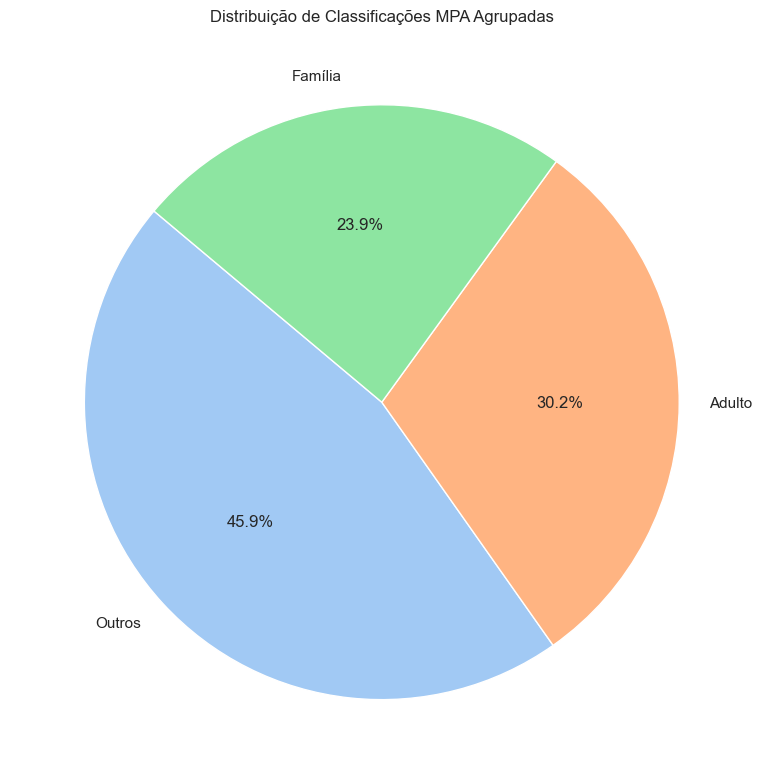

In [7]:
def agrupa_faixa(mpa):
    if mpa in ['R', 'NC-17']:
        return 'Adulto'
    elif mpa in ['PG', 'G', 'PG-13']:
        return 'Família'
    else:
        return 'Outros'

df['MPA_grouped'] = df['MPA'].apply(agrupa_faixa)

# 2. Gráfico de Pizza - Classificação MPA
mpa_grouped_counts = df['MPA_grouped'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mpa_grouped_counts, labels=mpa_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribuição de Classificações MPA Agrupadas')
plt.tight_layout()
plt.show()


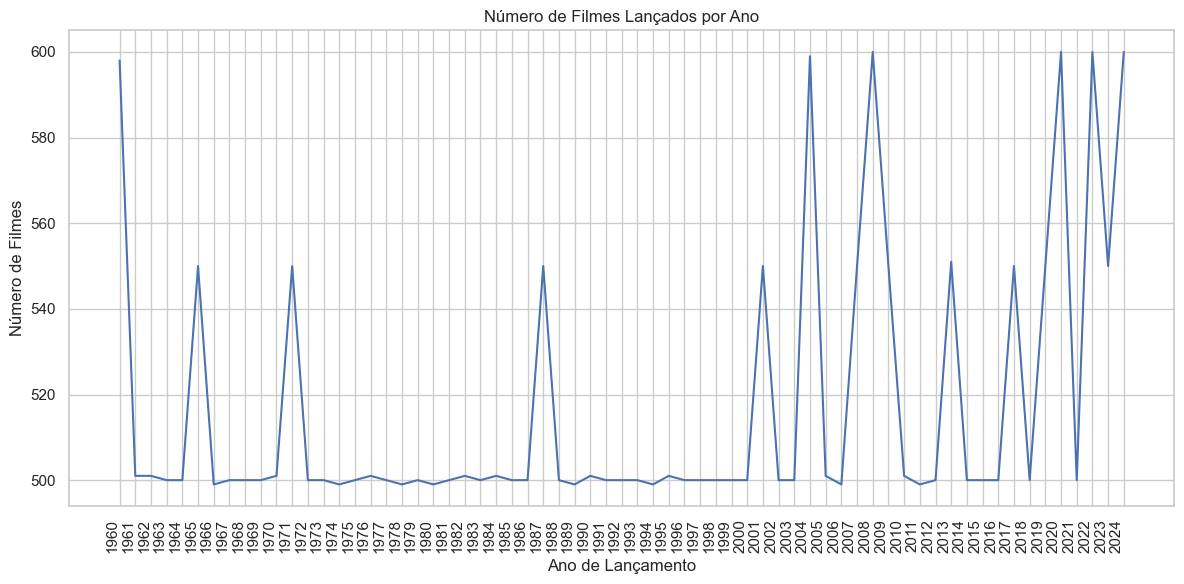

In [8]:

release_counts = df['Year'].value_counts().sort_index() #sort index para ordenar o grafico cronologicamente


plt.figure(figsize=(12, 6))
sns.lineplot(x=release_counts.index, y=release_counts.values)
plt.title('Número de Filmes Lançados por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes')

# Ajustar os ticks do eixo x para mostrar todos os anos
plt.xticks(release_counts.index, rotation=90, ha='right')

plt.tight_layout()
plt.show()

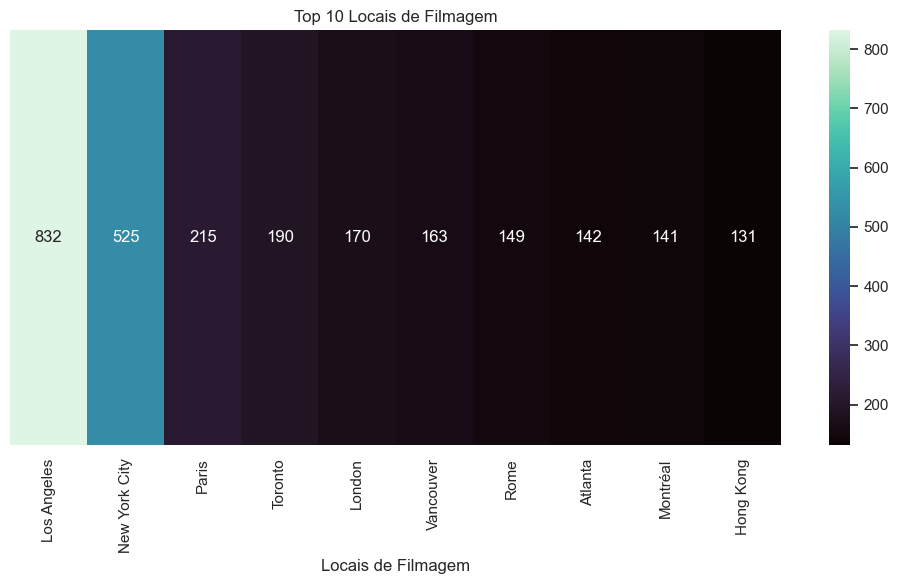

In [9]:
# 4. Gráfico de Barras - Locais de Filmagem
import matplotlib.pyplot as plt
import seaborn as sns

filming_counts = df['first_filming_locations'][(df['first_filming_locations']!= '') & (df['first_filming_locations'].notnull())].value_counts().head(10)

# Criar uma matriz para o mapa de calor
filming_matrix = filming_counts.values.reshape(1, -1)

plt.figure(figsize=(10, 6))
sns.heatmap(filming_matrix, annot=True, fmt="d", cmap="mako", xticklabels=filming_counts.index, yticklabels=False)
plt.title('Top 10 Locais de Filmagem')
plt.xlabel('Locais de Filmagem')
plt.ylabel('')  # Remover o rótulo do eixo y
plt.tight_layout()
plt.show()


C:\Users\mathe\AppData\Local\Temp\ipykernel_23448\566708146.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




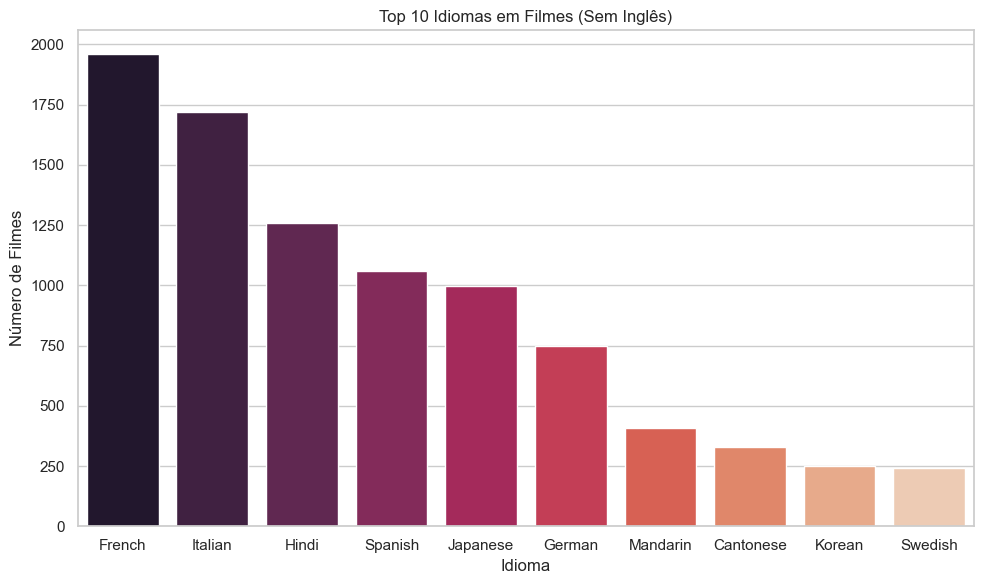

In [ ]:
language_counts = df['first_Languages'][(df['first_Languages'] != '') & (df['first_Languages'] != 'English')& (df['first_Languages'].notnull())].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="rocket") # Eixos Invertidos
plt.title('Top 10 Idiomas em Filmes (Sem Inglês)')
plt.xlabel('Idioma') # Invertidos
plt.ylabel('Número de Filmes') # Invertidos
plt.tight_layout()
plt.show()

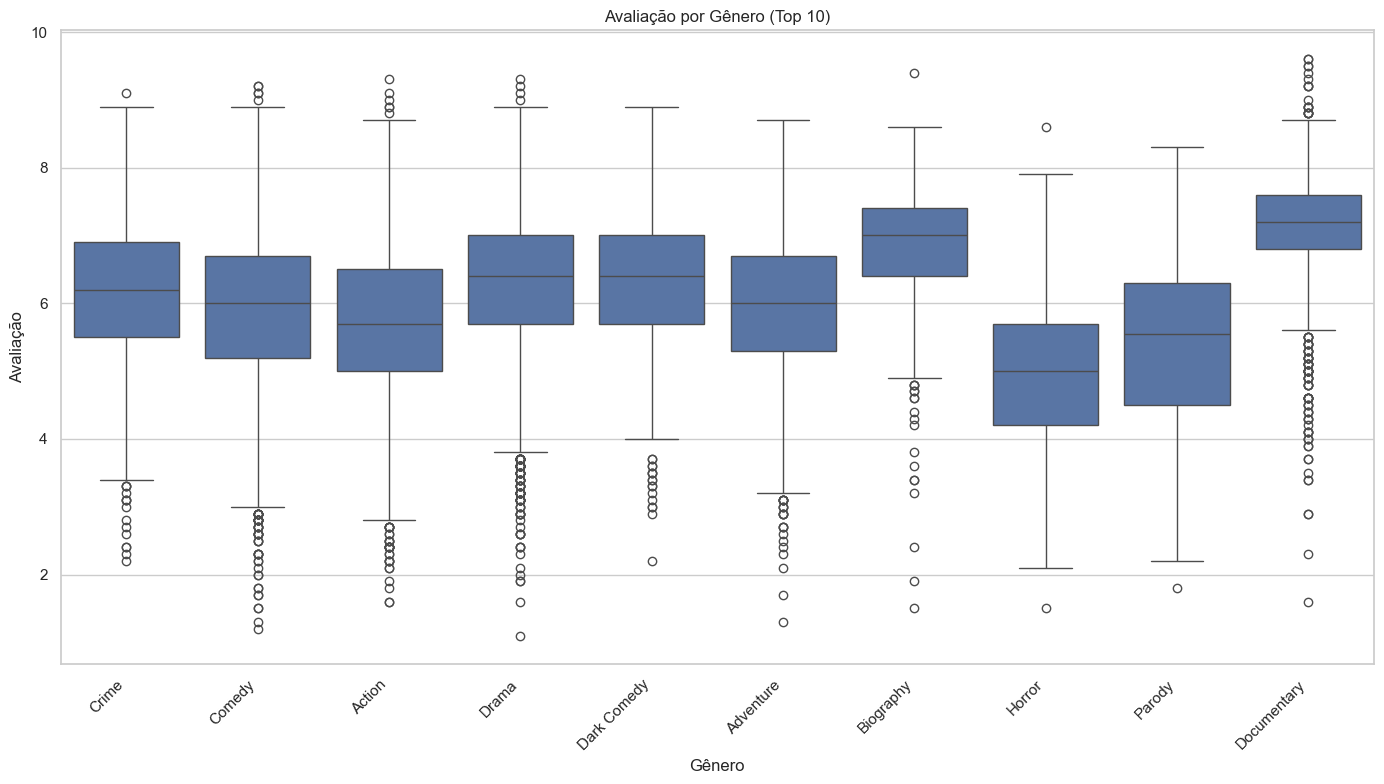

In [11]:
# Dividir os gêneros em listas
df['genres'] = df['first_genres'].str.split(', ')

# Criar linhas duplicadas para gêneros individuais
df_exploded = df.explode('genres')

# Remover linhas com valores ausentes em 'genres' ou 'Rating'
df_clean = df_exploded.dropna(subset=['genres', 'Rating'])

# Selecionar os 10 gêneros mais frequentes
top_genres = df_clean['genres'].value_counts().head(10).index

# Filtrar o DataFrame para incluir apenas os gêneros mais frequentes
df_filtered = df_clean[df_clean['genres'].isin(top_genres)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='genres', y='Rating', data=df_filtered)
plt.title('Avaliação por Gênero (Top 10)')
plt.xlabel('Gênero')
plt.ylabel('Avaliação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()